In [16]:

# Import the libraries we need
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Load the dataset
file_path = 'Laptop_price.csv' 
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0    Asus         3.830296        16               512    11.185147  2.641094   
1    Acer         2.912833         4              1000    11.311372  3.260012   
2  Lenovo         3.241627         4               256    11.853023  2.029061   
3    Acer         3.806248        16               512    12.280360  4.573865   
4    Acer         3.268097        32              1000    14.990877  4.193472   

          Price  
0  17395.093065  
1  31607.605919  
2   9291.023542  
3  17436.728334  
4  32917.990718

In [17]:
# Manipulate the dataset of the DataFrame to convert the Russian Ruble currency to Canadian Dollars
data['Price'] *= (1.0 / 70.07)

# Round all floating point decimals to two decimal places
data['Processor_Speed'] = data['Processor_Speed'].apply(lambda x: round(x, 2))
data['Screen_Size'] = data['Screen_Size'].apply(lambda x: round(x, 2))
data['Weight'] = data['Weight'].apply(lambda x: round(x, 2))
data['Price'] = data['Price'].apply(lambda x: round(x,2))

In [18]:

# Display data info to check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [19]:

# Create price categories (Low, Medium, High) based on price rangesprice_bins = [0, 10000, 20000, 50000]  # Adjust these based on dataset's price distribution
price_bins = [0, 142, 428, 713]  # Change these if needed
price_labels = ['Low', 'Medium', 'High']
data['Price_Range'] = pd.cut(data['Price'], bins=price_bins, labels=price_labels)

# Check the new column to see if the prices were categorized correctly
data[['Price', 'Price_Range']].head()

Price Price_Range
0  248.25      Medium
1  451.09        High
2  132.60         Low
3  248.85      Medium
4  469.79        High

In [20]:

# Pick the features (columns) we’ll use to predict the price range
# and the target (Price_Range) we want to predict
features = data[['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight']]
target = data['Price_Range']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [21]:

# Create and train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
# Perform 5-Fold Cross-Validation to evaluate model stability
cv_scores = cross_val_score(dt_classifier, features, target, cv=5) 

# Print cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.955 0.98  0.965 0.985 0.955]
Average Cross-Validation Accuracy: 0.968


In [23]:

# Make predictions with the test data
predications = dt_classifier.predict(X_test)

# Check the accuracy of the model
accuracy = accuracy_score(y_test, predications)
print(f"Decision Tree Classifier Accuracy: {accuracy}")

# Show the confusion matrix to see how well each category was predicted
conf_matrix = confusion_matrix(y_test, predications)
print("Confusion Matrix:")
print(conf_matrix)


Decision Tree Classifier Accuracy: 0.96
Confusion Matrix:
[[67  0  0]
 [ 0 42  3]
 [ 0  5 83]]


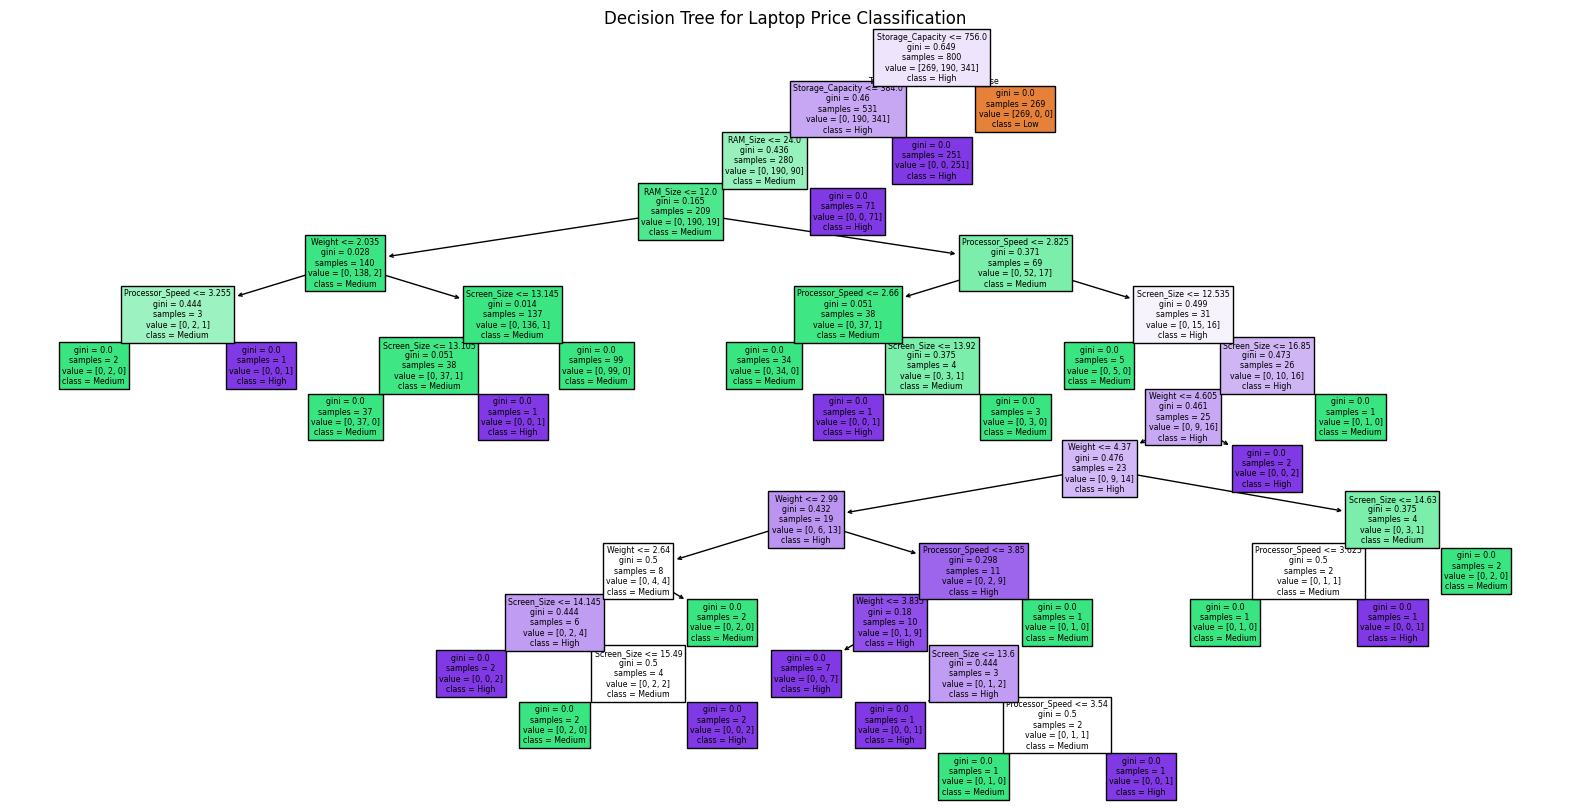

In [24]:

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, feature_names=features.columns, class_names=price_labels, filled=True)
plt.title("Decision Tree for Laptop Price Classification")
plt.show()